In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_x = pd.read_csv("/home/keenu/Documents/project_k/train_time_series.csv")
df_y = pd.read_csv("/home/keenu/Documents/project_k/train_labels.csv")

In [5]:
df_x.head(10)

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450
5,20591,1565109931288,2019-08-06T16:45:31.288,unknown,-0.010880,-0.967575,0.170898
6,20592,1565109931388,2019-08-06T16:45:31.388,unknown,0.052841,-0.982330,0.235565
7,20593,1565109931488,2019-08-06T16:45:31.488,unknown,0.032974,-1.053207,0.256714
8,20594,1565109931589,2019-08-06T16:45:31.589,unknown,-0.090424,-0.972794,0.356308
9,20595,1565109931689,2019-08-06T16:45:31.689,unknown,0.124268,-0.890533,0.223221


In [20]:
df1 = df_x.drop("Unnamed: 0", axis=1)

In [22]:
df2 = df1.drop("accuracy", axis=1)

In [29]:
df3 = df2.drop("UTC time", axis=1)

In [30]:
df3.head()

,timestamp,x,y,z
0,1565109930787,-0.006485,-0.934860,-0.069046
1,1565109930887,-0.066467,-1.015442,0.089554
2,1565109930987,-0.043488,-1.021255,0.178467
3,1565109931087,-0.053802,-0.987701,0.068985
4,1565109931188,-0.054031,-1.003616,0.126450


In [6]:
df_y.head(10)

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1
5,20639,1565109936099,2019-08-06T16:45:36.099,1
6,20649,1565109937101,2019-08-06T16:45:37.101,1
7,20659,1565109938103,2019-08-06T16:45:38.103,1
8,20669,1565109939106,2019-08-06T16:45:39.106,1
9,20679,1565109940108,2019-08-06T16:45:40.108,2


In [31]:
final = df3.merge(df_y, on= "timestamp")

In [32]:
final.head(5)

,timestamp,x,y,z,Unnamed: 0,UTC time,label
0,1565109931087,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1
1,1565109932090,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1
2,1565109933092,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1
3,1565109934094,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1
4,1565109935097,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1


In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   375 non-null    int64  
 1   x           375 non-null    float64
 2   y           375 non-null    float64
 3   z           375 non-null    float64
 4   Unnamed: 0  375 non-null    int64  
 5   UTC time    375 non-null    object 
 6   label       375 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 23.4+ KB


In [36]:
final.isnull().sum()

timestamp     0
x             0
y             0
z             0
Unnamed: 0    0
UTC time      0
label         0
dtype: int64

In [38]:
final

,timestamp,x,y,z,Unnamed: 0,UTC time,label
0,1565109931087,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1
1,1565109932090,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1
2,1565109933092,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1
3,1565109934094,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1
4,1565109935097,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1
...,...,...,...,...,...,...,...
370,1565110302030,-0.641953,-1.469177,0.301041,24289,2019-08-06T16:51:42.030,4
371,1565110303032,-0.171616,-0.366074,-0.059082,24299,2019-08-06T16:51:43.032,4
372,1565110304034,0.401810,-1.077698,0.258911,24309,2019-08-06T16:51:44.034,4
373,1565110305037,0.330338,-1.470062,0.303894,24319,2019-08-06T16:51:45.037,4


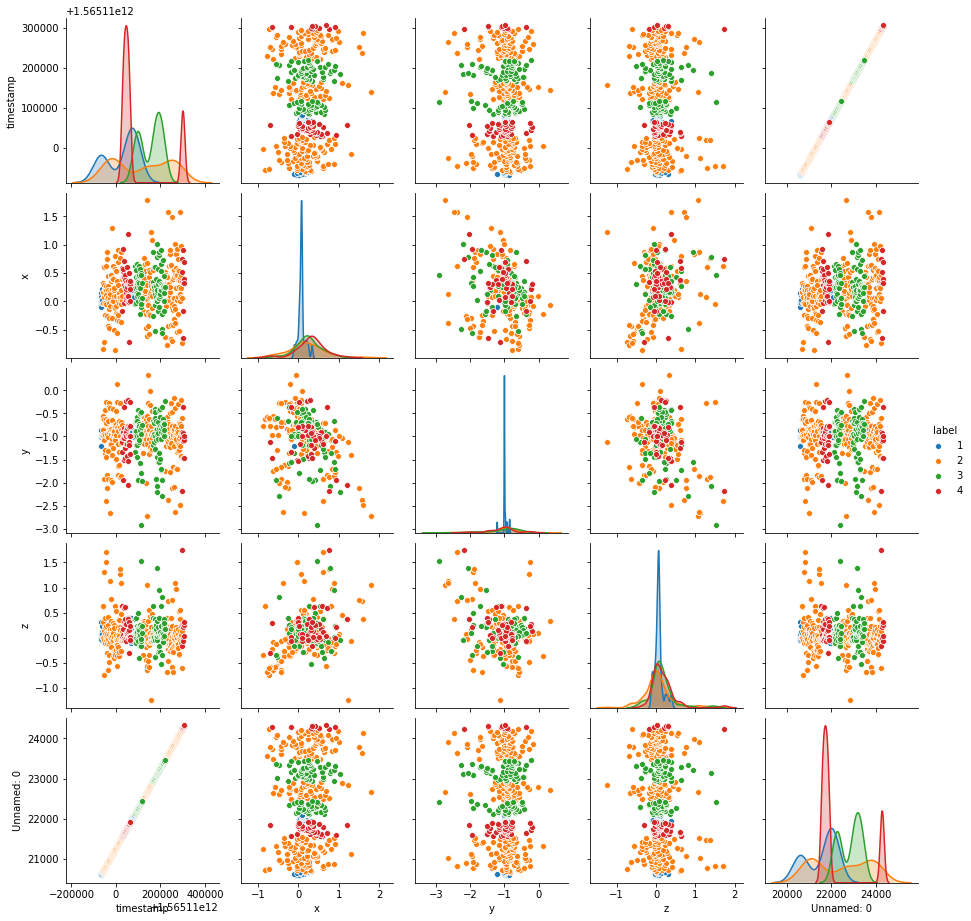

In [40]:
sns.pairplot(final, hue="label")

In [41]:
final['timestamp'] = pd.to_datetime(final['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [42]:
final.head()

,timestamp,x,y,z,Unnamed: 0,UTC time,label
0,1970-01-01 00:26:05.109931087,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1
1,1970-01-01 00:26:05.109932090,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1
2,1970-01-01 00:26:05.109933092,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1
3,1970-01-01 00:26:05.109934094,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1
4,1970-01-01 00:26:05.109935097,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1


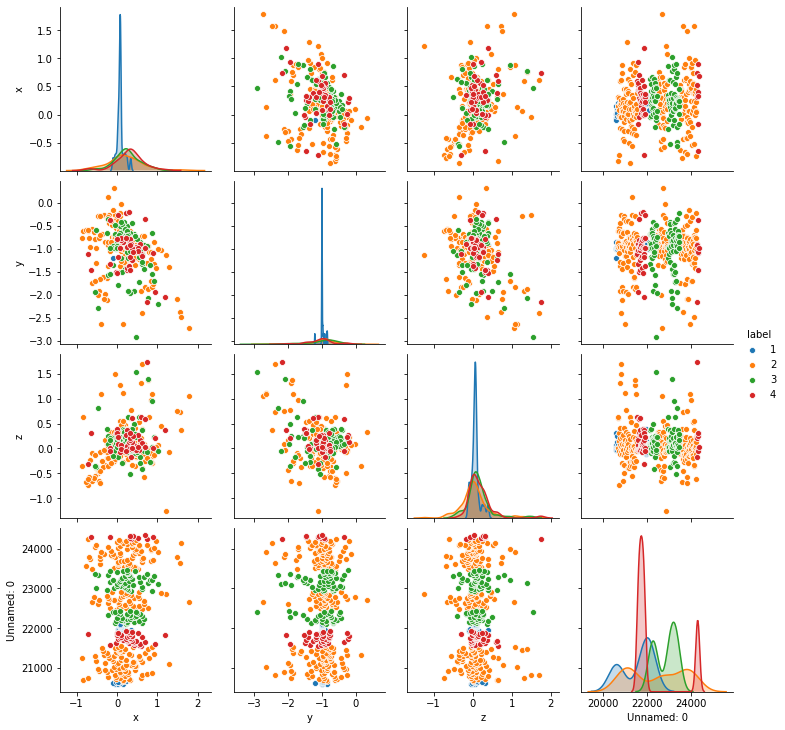

In [43]:
sns.pairplot(final, hue="label")